In [4]:
import pandas as pd
import os
import random
import numpy as np
import tensorflow as tf
import cv2


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import matplotlib.pyplot as plt

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
class Folder:
    def __init__(self, path):
        self.path = path
    def _read(self, dim):
        self.files = []
        for folder in os.listdir(self.path):
            if folder == ".DS_Store":
                continue
            print(folder)
            for file in os.listdir(self.path + "/" + folder):
                image = cv2.cvtColor(cv2.imread(self.path + "/" + folder + "/" + file), cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, dim)
                self.files.append(image)

        return np.asarray(self.files)

    def _assignLabels(self, label):
        self.labels = np.zeros(len(self.files))
        for i in range(len(self.files)):
            self.labels[i] = label
            
        return self.labels

    def getData(self, label, dim = (100,100), custom_func = None):
        x = self._read(dim)
        if custom_func != None:
            y = custom_func((os.listdir(self.path)))
        else:  
            y = self._assignLabels(label)
        
        return x,y
    
class Data:
    def __init__(self):
        self.x = np.array([])
        self.y = np.array([])
    def add(self, folder, label, dim, custom_func = None):
        x, y = folder.getData(label, dim, custom_func)

        if np.array_equal(self.x, np.array([])):
            self.x = x
            self.y = y
        else: 

            self.x = np.append(self.x, x, axis = 0)
            self.y = np.append(self.y,y, axis = 0)

    def tts(self, test_size):
        if np.array_equal(self.x, np.array([])):
            return None
        
        x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, test_size=test_size, random_state=42)
        
        return x_train, x_test, y_train, y_test

In [11]:
def read_txt(path):
    with open(path, "r") as file:
        return file.read().split("\n")

In [12]:
train_dir = read_txt("train.txt")
test_dir = read_txt("test.txt")
classes = np.asarray(read_txt("classes.txt"))
labels_text = read_txt("labels.txt")

In [8]:
def labels(fileNames):
    y = []
    for folder in fileNames:
        if folder == ".DS_Store":
            continue
        for file in os.listdir("images/" + folder):
            name = file
            str_label = folder
            #print(str_label, name)
            int_label = np.where(classes == str_label)[0]
            final = np.zeros(len(classes))
            final[int_label] = 1.0
            y.append(final)
        
    return np.asarray(y) 

In [9]:
imgs = Folder("images")
data = Data()

In [10]:
data.add(imgs, None, (100,100), labels)

foie_gras
club_sandwich
cheese_plate
cup_cakes
garlic_bread
gnocchi
ice_cream
samosa
donuts
tuna_tartare
filet_mignon
seaweed_salad
french_toast
chicken_curry
shrimp_and_grits
steak
cheesecake
red_velvet_cake
waffles
churros
gyoza
lobster_roll_sandwich
huevos_rancheros
breakfast_burrito
grilled_cheese_sandwich
spaghetti_bolognese
falafel
poutine
greek_salad
beef_tartare
fried_calamari
guacamole
ravioli
lobster_bisque
beet_salad
risotto
crab_cakes
strawberry_shortcake
edamame
ceviche
hot_and_sour_soup
spring_rolls
sashimi
paella
clam_chowder
miso_soup
escargots
hot_dog
pulled_pork_sandwich
bruschetta
panna_cotta
fish_and_chips
pad_thai
tiramisu
takoyaki
macarons
apple_pie
cannoli
scallops
frozen_yogurt
chicken_quesadilla
mussels
beef_carpaccio
eggs_benedict
spaghetti_carbonara
omelette
sushi
chocolate_mousse
beignets
bibimbap
hummus
pork_chop
chicken_wings
grilled_salmon
chocolate_cake
tacos
hamburger
baby_back_ribs
pancakes
prime_rib
pizza
nachos
macaroni_and_cheese
bread_pudding
ramen

In [12]:
del data.x # save memory
del data.y # save memory

In [11]:
x_train, x_val, y_train, y_val = data.tts(0.2)

In [14]:
def create_model():
    base_model = tf.keras.applications.EfficientNetB1(
    weights= "imagenet", include_top=False, input_shape= (100,100,3)
    )
    num_classes=102

    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
   
    x = tf.keras.layers.Dropout(0.2)(x)
    predictions = tf.keras.layers.Dense(num_classes, activation= 'softmax')(x)
    model = tf.keras.Model(inputs = base_model.input, outputs = predictions)
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=['acc'])
    return model

In [15]:
epochs = 10
model = create_model()
model.fit(x_train, y_train, batch_size = 32, epochs = epochs, validation_data = (x_val, y_val))


2023-08-15 22:14:08.801653: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-15 22:14:08.801715: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-15 22:14:08.801720: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-15 22:14:08.801806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-15 22:14:08.801826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


94765736/94765736 [==============================] - 8s 0us/step
Epoch 1/5


2023-08-15 22:14:23.810314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 132/2525 [>.............................] - ETA: 10:43 - loss: 5.3049 - acc: 0.0116

KeyboardInterrupt: 

In [99]:
model.save("")

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


In [7]:
model = tf.keras.models.load_model("assets2") # or whatever the folder is called

2023-08-17 18:45:36.206401: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-17 18:45:36.206423: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-17 18:45:36.206430: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-17 18:45:36.206488: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-17 18:45:36.206611: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [50]:
def predict_on_custom_image(path, model):
    label_names = classes
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    image = cv2.resize(image, (100,100))
    predictions = model.predict(image.reshape(1, 100, 100, 3, 1))[0]
    chosen = predictions.argmax()
    pred2 = np.delete(predictions, np.where(predictions == predictions[chosen])).argmax()
    if predictions[pred2] > 0.2:
        #print(f"{predictions[pred2]}% confidence")
        print(f"Prediction: , {label_names[chosen]} {predictions[chosen]}% and {label_names[pred2]} {predictions[pred2]}%")
    #print(label_names[pred2])
    #print(f"{predictions[pred2]}% confidence")
    else:
        print("Prediction: ", label_names[chosen])
        print(f"{predictions[chosen]}% confidence")

In [52]:
def predict_on_image_return(path, model):
    label_names = classes
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    image = cv2.resize(image, (100,100))
    predictions = model.predict(image.reshape(1, 100, 100, 3, 1))[0]
    chosen = predictions.argmax()
    return label_names[chosen]

bruschetta/1902679.jpg
1/1 [==============================] - 0s 135ms/step
Prediction:  grilled_salmon
0.12214020639657974% confidence


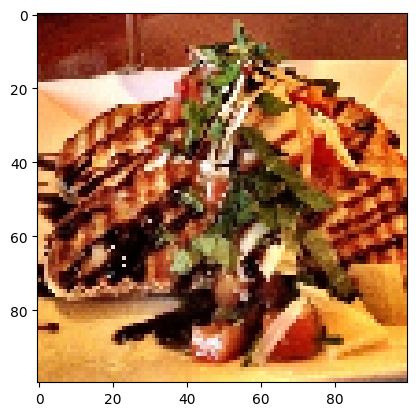

In [69]:
rand_image = test_dir[random.randint(0,len(test_dir) - 1)] + ".jpg"
print(rand_image)
#predict_on_custom_image("test_images/test_images/" + rand_image, frozen_model)
predict_on_custom_image("images/" + rand_image, model)


In [ ]:
test_images = os.listdir("test_images/test_images")
rand_image = test_images[random.randint(0,len(test_images) - 1)]
print(rand_image)
predict_on_custom_image("test_images/test_images/" + rand_image, model)


In [70]:
classes

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake',
       'cheese_plate', 'chicken_curry', 'chicken_quesadilla',
       'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros',
       'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee',
       'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts',
       'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel',
       'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries',
       'french_onion_soup', 'french_toast', 'fried_calamari',
       'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi',
       'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon',
       'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog',
       'huevos_rancheros', 'hummus', 'ice_cr

In [18]:
base_model = tf.keras.applications.EfficientNetB1(
    weights= "imagenet", include_top=False, input_shape= (256,256,3)
    )

2023-08-07 08:28:41.121374: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-07 08:28:41.121429: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-07 08:28:41.121434: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-07 08:28:41.121606: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-07 08:28:41.121658: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
def create_model():
    base_model = tf.keras.applications.EfficientNetB1(
    weights= "imagenet", include_top=False, input_shape= (256,256,3)
    )
    num_classes=61
    
    base_model.trainable = False
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    predictions = tf.keras.layers.Dense(num_classes, activation= 'softmax')(x)
    model = tf.keras.Model(inputs = base_model.input, outputs = predictions)
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['acc'])
    return model

In [22]:
frozen_model = create_model()
epochs = 10

In [23]:
frozen_model.fit(x_train, y_train, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/10


2023-08-07 09:12:19.798566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - ETA: 0s - loss: 2.3185 - acc: 0.4166

2023-08-07 09:13:47.769907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - 114s 465ms/step - loss: 2.3185 - acc: 0.4166 - val_loss: 1.7140 - val_acc: 0.5314
Epoch 2/10
234/234 [==============================] - 104s 445ms/step - loss: 1.5304 - acc: 0.5629 - val_loss: 1.5472 - val_acc: 0.5555
Epoch 3/10
234/234 [==============================] - 104s 443ms/step - loss: 1.3322 - acc: 0.6070 - val_loss: 1.5085 - val_acc: 0.5592
Epoch 4/10
234/234 [==============================] - 104s 446ms/step - loss: 1.1940 - acc: 0.6448 - val_loss: 1.4842 - val_acc: 0.5651
Epoch 5/10
234/234 [==============================] - 104s 445ms/step - loss: 1.1075 - acc: 0.6704 - val_loss: 1.4765 - val_acc: 0.5657
Epoch 6/10
234/234 [==============================] - 105s 449ms/step - loss: 1.0348 - acc: 0.6931 - val_loss: 1.4784 - val_acc: 0.5576
Epoch 7/10
234/234 [==============================] - 106s 452ms/step - loss: 0.9777 - acc: 0.7041 - val_loss: 1.4713 - val_acc: 0.5635
Epoch 8/10
234/234 [==============================] - 107s 

In [370]:
model = tf.keras.models.load_model("assets")

In [2]:
model.summary()

NameError: name 'model' is not defined

In [80]:
import food
test_images = os.listdir("test_images/test_images")
rand_image = test_images[random.randint(0,len(test_images) - 1)]
prediction = (predict_on_image_return("train_images/train_images/" + "0a5a91df5d.jpg", model)).split("-")
prediction = [value for value in prediction if value != "with" and value != "without"]
print(prediction)
finalPred = None
maxMatches = 0
secondaryPred = None
secondMaxMatches = 0
for fd in food.get_report():
   # if prediction.lower() in fd["Description"].lower()
    matches = 0
    for item in prediction:
        if item.lower() == fd["Category"].lower():
            matches += 1
        if item.lower() in fd["Description"].lower():
            matches += 1
                
    if matches > maxMatches:
        maxMatches = int(matches)
        finalPred = fd
    elif matches > secondMaxMatches:
        secondMaxMatches = matches
        secondaryPred = fd
        
print(finalPred)
print(secondaryPred)
print(pred)


ModuleNotFoundError: No module named 'food'

In [75]:
food.get_report()

NameError: name 'food' is not defined

In [46]:
awe += 1

NameError: name 'awe' is not defined

[ WARN:0@137984.911] global loadsave.cpp:244 findDecoder imread_('test_images/test_images/chocolate_cake/3515160.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
